#Programming Exercise 2: Logistic Regression
##Machine Learning
###Introduction

In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in ex2.m will guide you through the exercise.

In [1]:
# load dataset 1 and import necessary modules

import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

#load the txt file (with pandas)
with open('ex2data1.txt', 'r') as datafile:
    data = pd.read_csv(datafile, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])  

In [2]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1) #pd method

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  #pd method
y = data.iloc[:,cols-1:cols] #pd method

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  #X.values => pd method
y = np.array(y.values)  
theta = np.zeros(3)  

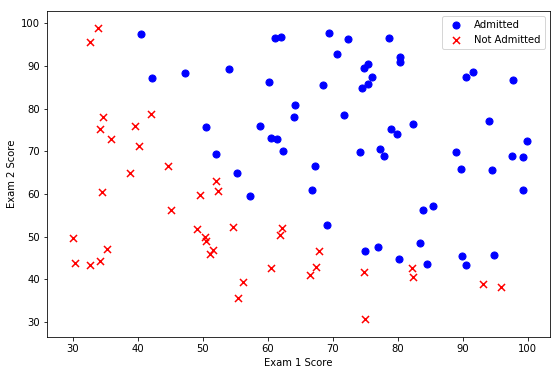

In [3]:
# Viz
positive = data[data['Admitted'].isin([1])]  #filter
negative = data[data['Admitted'].isin([0])]  #filter

fig, ax = plt.subplots(figsize=(9,6))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

plt.show()

In [4]:
# define sigmoid function
#sigmoid should apply np.exp instead of math.exp
#bcz math.exp returns only 1 digital number
#but what we want is an matrix / array
def sigmoid(x):
    '''Compute the sigmoid function'''
    return 1. / (1. + np.exp(-x))

In [5]:
def cost(theta, X, y):  
    '''compute the cost function'''
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T))) #np.ndarray.T => transpose
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [6]:
X.shape, theta.shape, y.shape  

((100, 3), (3,), (100, 1))

In [7]:
cost(theta, X, y)  

0.69314718055994529

In [8]:
def gradient(theta, X, y):  
    '''set the gradient descent function'''
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1]) 
    #ravel is applied to flatten the array items
    #x = np.array([[1, 2, 3], [4, 5, 6]])
    #>>> print(np.ravel(x))
    #[1 2 3 4 5 6]
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [9]:
import scipy.optimize as opt  
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html#scipy.optimize.fmin_tnc
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y)  

0.20349770158947458

In [10]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In the previous assignment, you found the optimal parameters of a linear re- gression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use an Octave/- MATLAB built-in function called fminunc.
Octave/MATLAB’s fminunc is an optimization solver that finds the min- imum of an unconstrained2 function. For logistic regression, you want to optimize the cost function J(θ) with parameters θ.
Concretely, you are going to use fminunc to find the best parameters θ for the logistic regression cost function, given a fixed dataset (of X and y values).

##Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assur- ance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [53]:
# load the dataset
with open('ex2data2.txt', 'r') as datafile:
    data2 = pd.read_csv(datafile, header=None, names=['Microchip Test 1', 'Microchip Test 2', 'Outcome'])  

In [54]:
# add a ones column - this makes the matrix multiplication work out easier
data2.insert(0, 'Ones', 1) #pd method

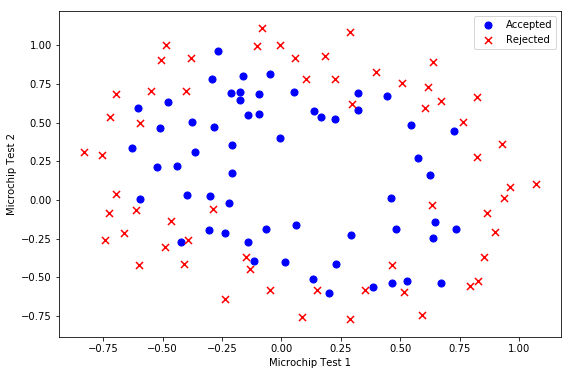

In [55]:
# viz
accepted = data2[data2['Outcome'].isin([1])]
rejected = data2[data2['Outcome'].isin([0])]
#isin => return boolean values

fig, ax = plt.subplots(figsize=(9,6))  
ax.scatter(accepted['Microchip Test 1'], accepted['Microchip Test 2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(rejected['Microchip Test 1'], rejected['Microchip Test 2'], s=50, c='r', marker='x', label='Rejected')  
ax.legend()  
ax.set_xlabel('Microchip Test 1')  
ax.set_ylabel('Microchip Test 2')  

plt.show()

In [56]:
# enlarge dimentions, x1 * x2 must be below or equal to 6 dimentions
degree = 6
# define dimentions params 
x1 = data2['Microchip Test 1']
x2 = data2['Microchip Test 2']

for i in range(0, degree):
    for j in range(0, degree):
        if i+j > degree: continue
        data2['F' + str(i) + str(j)] = np.power(x1, i) * np.power(x2, j)

# remove x1 & x2 after adding the dimentions data

data2.drop('Microchip Test 1', axis = 1, inplace = True)
data2.drop('Microchip Test 2', axis = 1, inplace = True)

data2.head()

,Ones,Outcome,F00,F01,F02,F03,F04,F05,F10,F11,...,F24,F30,F31,F32,F33,F40,F41,F42,F50,F51
0,1,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.051267,0.035864,...,0.000629,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07
1,1,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,-0.092742,-0.063523,...,0.001893,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06
2,1,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,-0.213710,-0.147941,...,0.010488,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04
3,1,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,-0.375000,-0.188321,...,0.008944,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03
4,1,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,-0.513250,-0.238990,...,0.012384,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02


In [57]:
# column order was wrong
# https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas
cols = list(data2) # get a list of columns
# move the column to end of list using index, pop and insert
cols.insert(len(cols), cols.pop(cols.index('Outcome')))

# use ix to reorder
data2 = data2.loc[:, cols]
data2.head()

,Ones,F00,F01,F02,F03,F04,F05,F10,F11,F12,...,F30,F31,F32,F33,F40,F41,F42,F50,F51,Outcome
0,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1
1,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,1
2,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,1
3,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,1
4,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1


In [58]:
# set X (training data) and y (target variable)
cols = data2.shape[1]  
X = data2.iloc[:,0:cols-1]  #pd method
y = data2.iloc[:,cols-1:cols] #pd method

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  #X.values => pd method
y = np.array(y.values)  
theta = np.zeros(cols-1)

In [59]:
# define cost function with regularization params

def cost_reg(theta, X, y, l):
    '''compute cost J with regularization parameter'''
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T))) #np.ndarray.T => transpose
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    #reg is set for computing penalize lambda (l)
    reg = (l/2*m) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return (np.sum(first - second) / m) + reg

In [60]:
# define gradient descent function with reg params

def grad_reg(theta, X, y, l):
    '''compute gradient descent and update theta'''
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    parameters = int(theta.ravel().shape[1]) 
    #ravel is applied to flatten the array items
    #x = np.array([[1, 2, 3], [4, 5, 6]])
    #>>> print(np.ravel(x))
    #[1 2 3 4 5 6]
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        reg = (l / m) * theta[:, i]
        if i > 0:
            grad[i] = (np.sum(term) / m) + reg
        else:
            grad[i] = (np.sum(term) / m)

    return grad

In [61]:
cost_reg(theta, X, y, 1)

0.6931471805599454

In [62]:
# find the optimum theta_array
result2 = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=grad_reg, args=(X, y, 1))  
result2

(array([  1.51728502e-04,   1.20727392e-04,   2.66327236e-04,
         -2.83014200e-04,  -7.63342895e-05,  -2.99600355e-04,
         -1.76282580e-04,   1.51738386e-04,  -1.26338307e-04,
         -5.35062850e-05,  -2.68038857e-05,  -4.06550093e-05,
         -8.97081797e-06,  -4.65837297e-04,  -6.15972690e-05,
         -1.26823780e-04,  -5.32506854e-05,  -6.93885373e-05,
          1.09550432e-05,  -7.38888579e-06,  -1.40222916e-05,
          3.15577130e-06,  -3.48834233e-04,  -4.05485617e-05,
         -6.29810330e-05,  -6.99052527e-05,   2.79898439e-06]), 97, 4)

In [63]:
cost_reg(result2[0], X, y, 1)

0.6931207076250353

In [67]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta.T))
    return [1 if x >= 0.5 else 0 for x in probability]


theta_min = np.matrix(result2[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print ('accuracy = {0}%'.format(accuracy))

accuracy = 96%
